In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles 
from sklearn.model_selection import train_test_split

In [2]:
x1, y1 = make_gaussian_quantiles(cov=1.5,n_samples=600, n_features=2,n_classes=2, random_state=420)
x2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=600, n_features=2, n_classes=2, random_state=420)
X = np.concatenate((x1, x2))
Y = np.concatenate((1-y1, y2))
x,xtest,y,ytest = train_test_split(X, Y, test_size=0.3, random_state=310)

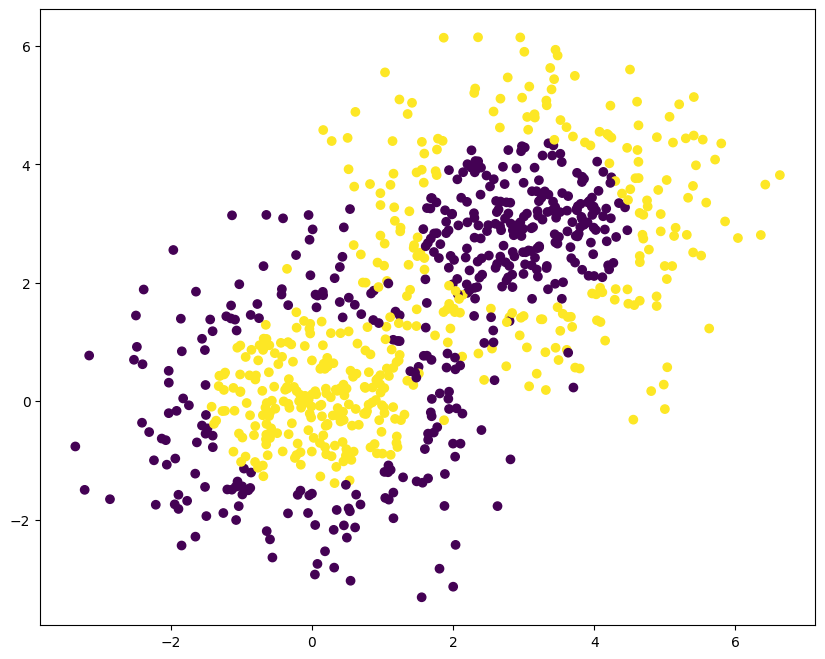

In [3]:
plt.figure(figsize=(10,8))
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y)

In [4]:
Adaboost = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=2, min_samples_split=10,
min_samples_leaf=5),
algorithm="SAMME.R",
n_estimators=100,
learning_rate=0.1)
Adaboost.fit(x, y)
print(Adaboost.score(xtest,ytest))

0.8861111111111111


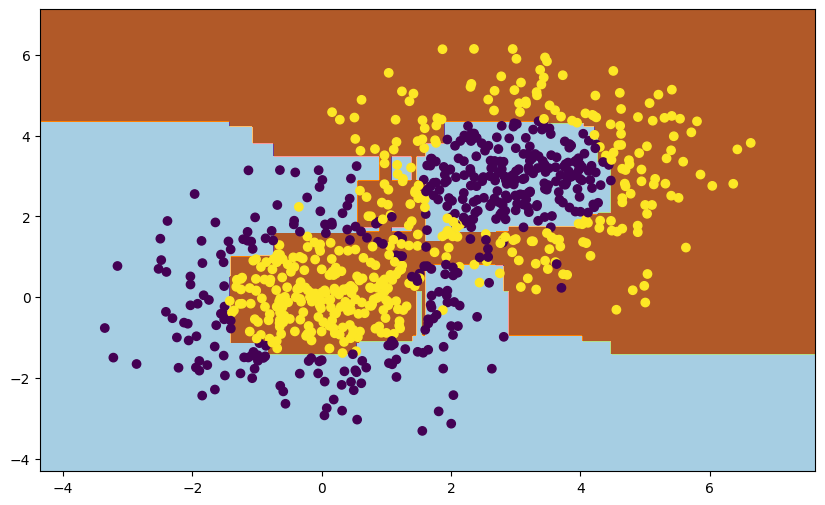

In [5]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),                     
np.arange(y_min, y_max, 0.02))
z = Adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(figsize=(10,6)) 
plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y)
plt.show()